In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
covid_data = pd.read_excel("covid19_tweets.xlsx")

In [3]:
covid_data

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179103,AJIMATI AbdulRahman O.,"Ilorin, Nigeria",Animal Scientist|| Muslim|| Real Madrid/Chelsea,2013-12-30 18:59:19,412,1609,1062,False,2020-08-29 19:44:21,Thanks @IamOhmai for nominating me for the @WH...,['WearAMask'],Twitter for Android,False
179104,Jason,Ontario,When your cat has more baking soda than Ninja ...,2011-12-21 04:41:30,150,182,7295,False,2020-08-29 19:44:16,2020! The year of insanity! Lol! #COVID19 http...,['COVID19'],Twitter for Android,False
179105,BEEHEMOTH ⏳,🇨🇦 Canada,⚒️ The Architects of Free Trade ⚒️ Really Did ...,2016-07-13 17:21:59,1623,2160,98000,False,2020-08-29 19:44:15,@CTVNews A powerful painting by Juan Lucena. I...,NaN,Twitter Web App,False
179106,Gary DelPonte,New York City,"Global UX UI Visual Designer. StoryTeller, Mus...",2009-10-27 17:43:13,1338,1111,0,False,2020-08-29 19:44:14,"More than 1,200 students test positive for #CO...",['COVID19'],Twitter for iPhone,False


In [4]:
import tqdm

In [5]:
rows,columns = covid_data.shape

In [6]:
rows

179108

In [7]:
columns

13

In [8]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_name         179108 non-null  object        
 1   user_location     142304 non-null  object        
 2   user_description  168822 non-null  object        
 3   user_created      179108 non-null  datetime64[ns]
 4   user_followers    179108 non-null  int64         
 5   user_friends      179108 non-null  int64         
 6   user_favourites   179108 non-null  int64         
 7   user_verified     179108 non-null  bool          
 8   date              179108 non-null  datetime64[ns]
 9   text              179108 non-null  object        
 10  hashtags          127774 non-null  object        
 11  source            179031 non-null  object        
 12  is_retweet        179108 non-null  bool          
dtypes: bool(2), datetime64[ns](2), int64(3), object(6)
memory u

In [9]:
covid_data.describe()

,user_followers,user_friends,user_favourites
count,1.791080e+05,179108.000000,1.791080e+05
mean,1.090555e+05,2121.701566,1.444411e+04
std,8.414670e+05,9162.553072,4.452270e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.720000e+02,148.000000,2.060000e+02
50%,9.920000e+02,542.000000,1.791000e+03
75%,5.284000e+03,1725.250000,9.388000e+03
max,4.944256e+07,497363.000000,2.047197e+06


In [10]:
covid_data.isnull().sum()

user_name               0
user_location       36804
user_description    10286
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            51334
source                 77
is_retweet              0
dtype: int64

In [11]:
covid_data.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

<AxesSubplot:>

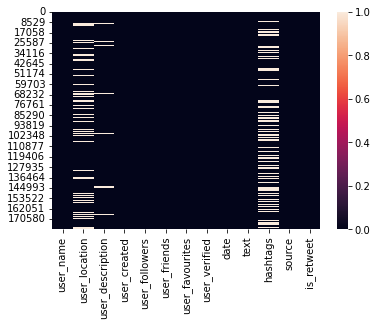

In [12]:

sns.heatmap(covid_data.isnull())

### We have to remove the null values as we cannot impute or fill coloumns with string values,also its negligible compare to total value

In [13]:
covid_data.dropna(inplace=True)
covid_data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
5,🎹 Franz Schubert,Новоро́ссия,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,2018-03-19 16:29:52,1180,1071,1287,False,2020-07-25 12:27:06,#coronavirus #covid19 deaths continue to rise....,"['coronavirus', 'covid19']",Twitter Web App,False
6,hr bartender,"Gainesville, FL",Workplace tips and advice served up in a frien...,2008-08-12 18:19:49,79956,54810,3801,False,2020-07-25 12:27:03,How #COVID19 Will Change Work in General (and ...,"['COVID19', 'Recruiting']",Buffer,False


In [14]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99117 entries, 2 to 179106
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_name         99117 non-null  object        
 1   user_location     99117 non-null  object        
 2   user_description  99117 non-null  object        
 3   user_created      99117 non-null  datetime64[ns]
 4   user_followers    99117 non-null  int64         
 5   user_friends      99117 non-null  int64         
 6   user_favourites   99117 non-null  int64         
 7   user_verified     99117 non-null  bool          
 8   date              99117 non-null  datetime64[ns]
 9   text              99117 non-null  object        
 10  hashtags          99117 non-null  object        
 11  source            99117 non-null  object        
 12  is_retweet        99117 non-null  bool          
dtypes: bool(2), datetime64[ns](2), int64(3), object(6)
memory usage: 9.3+ MB


In [15]:
covid_data.user_name.value_counts()

covidnews.ch              402
GlobalPandemic.NET        320
Blood Donors India        282
Hindustan Times           267
IANS Tweets               228
                         ... 
CODEINE COWBOY🍼🍬            1
Newsindia2580               1
University of Bath          1
Rebecca Linssen             1
AJIMATI AbdulRahman O.      1
Name: user_name, Length: 53233, dtype: int64

### Fuzzymatch and other techniques

In [16]:
df = covid_data.drop(['user_name','user_description','user_created','user_verified','date','text','hashtags','source','is_retweet'], axis=1)
df.head(20)

,user_location,user_followers,user_friends,user_favourites
2,"Pewee Valley, KY",9275,9525,7254
3,Stuck in the Middle,197,987,1488
4,Jammu and Kashmir,101009,168,101
5,Новоро́ссия,1180,1071,1287
6,"Gainesville, FL",79956,54810,3801
9,👇🏻location at link below👇🏻,55201,34239,29802
11,"Dhaka,Bangladesh",241,1694,8443
12,Hotel living - various cities! Who needs a ho...,0,8,32
13,Africa,830,254,3692
15,"Nagaland, India",274,32,378


In [17]:
#Fuzzi Matching
x=['Pankaj','Sudheer','Prerna','Gyan']
y=['abc','Prem','Pankaj','Sudha S','Arun','jkapna']
from fuzzywuzzy import fuzz,process

C:\Users\Joban Chauhan\AppData\Local\Programs\Python\Python39\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [18]:
matches=[]
for i in x:
    matches.append(process.extract(i,y,limit=2))

In [19]:
print(matches)

[[('Pankaj', 100), ('Arun', 45)], [('Sudha S', 57), ('Prem', 30)], [('Prem', 68), ('Pankaj', 50)], [('Arun', 50), ('Pankaj', 45)]]


In [20]:
x,y

(['Pankaj', 'Sudheer', 'Prerna', 'Gyan'],
 ['abc', 'Prem', 'Pankaj', 'Sudha S', 'Arun', 'jkapna'])

In [21]:
matches=[]
for i in x:
    matches.append(process.extract(i,y))
print(matches)

[[('Pankaj', 100), ('Arun', 45), ('jkapna', 33), ('abc', 30), ('Prem', 22)], [('Sudha S', 57), ('Prem', 30), ('Arun', 30), ('abc', 0), ('Pankaj', 0)], [('Prem', 68), ('Pankaj', 50), ('jkapna', 50), ('abc', 45), ('Arun', 40)], [('Arun', 50), ('Pankaj', 45), ('jkapna', 45), ('abc', 29), ('Sudha S', 25)]]


In [22]:
for i in matches:
    print(i)

[('Pankaj', 100), ('Arun', 45), ('jkapna', 33), ('abc', 30), ('Prem', 22)]
[('Sudha S', 57), ('Prem', 30), ('Arun', 30), ('abc', 0), ('Pankaj', 0)]
[('Prem', 68), ('Pankaj', 50), ('jkapna', 50), ('abc', 45), ('Arun', 40)]
[('Arun', 50), ('Pankaj', 45), ('jkapna', 45), ('abc', 29), ('Sudha S', 25)]


In [23]:
import difflib

In [24]:
from difflib import SequenceMatcher

In [25]:
s1='python world'
s2='The world is python'
sm2=SequenceMatcher(a=s1,b=s2)
sm2

In [26]:
sm2.ratio()

0.3870967741935484

In [27]:
s1='Joban Chauhan'
s2='Joban_Chauhan'
sm=SequenceMatcher(a=s1,b=s2)
sm.ratio()

0.9230769230769231

In [28]:
from difflib import Differ

In [29]:
from difflib import get_close_matches

In [30]:
d=get_close_matches('covid19',['world python','coronavirus','19covid','covid19','Covid'],cutoff=0.6)
print(d)

['covid19', '19covid', 'Covid']


In [31]:
d=get_close_matches('covid19',['world python','coronavirus','19covid','covid19','Covid'],n=2)
print(d)

['covid19', '19covid']


### EDA on Tweet count with Location

In [32]:
User_loc_df = covid_data.user_location.value_counts().reset_index()
User_loc_df.sort_values(by='user_location',ascending=False,inplace=True)
User_loc_df.rename(columns = {'index':'Location', 'user_location':'Count'}, inplace = True)

In [33]:
User_loc_df

,Location,Count
0,India,2978
1,United States,1736
2,"New Delhi, India",1349
3,"Mumbai, India",1098
4,"Washington, DC",956
...,...,...
11662,"Huntington,WV",1
11663,"GM, SAIL, Dhanbad, India",1
11664,Johannesburg & Cape Town,1
11665,"Puget Sound, USA",1


In [34]:
print(f"As we can see that {User_loc_df.Location[0]} has highest tweets on covid 19 is {User_loc_df.Count[0]}")

As we can see that India has highest tweets on covid 19 is 2978


Text(0, 0.5, 'Count Of tweets per User Location')

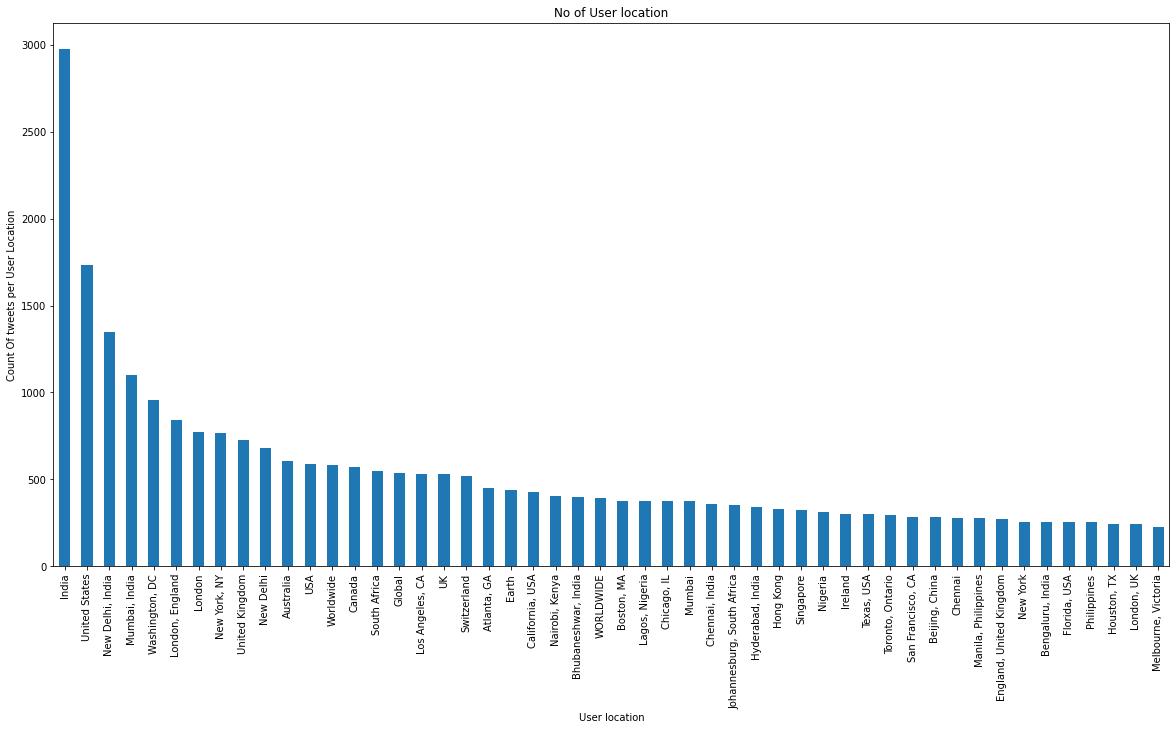

In [35]:
# We can see other country/regions tweet count (top 50) as shown compare to India

plt.figure(figsize=(20,10))
user_loc = covid_data.user_location.value_counts().head(50).plot.bar()
plt.title("No of User location")
plt.xlabel("User location")
plt.ylabel("Count Of tweets per User Location")


In [36]:
# user_loc_group = covid_data.groupby("user_location").plot.bar()

In [37]:
unique_loc = covid_data.user_location.unique()

In [38]:
len(unique_loc)

20371

In [39]:
unique_loc

array(['Pewee Valley, KY', 'Stuck in the Middle', 'Jammu and Kashmir',
       ..., 'Europe 🌏', 'Newton, NJ', 'T.O.'], dtype=object)

In [40]:
def df_unique_values(df):
    unique_df = pd.DataFrame()
    unique_df["column"] = covid_data.columns
    uni_values = []
    for i in covid_data.columns:
        j = covid_data[i].nunique()
        uni_values.append(j)
    unique_df["unique_values"] = uni_values
    return unique_df

In [41]:
df_unique = df_unique_values(covid_data)

In [42]:
df_unique

,column,unique_values
0,user_name,53233
1,user_location,20371
2,user_description,54637
3,user_created,53513
4,user_followers,22146
5,user_friends,9226
6,user_favourites,26037
7,user_verified,2
8,date,83767
9,text,98920


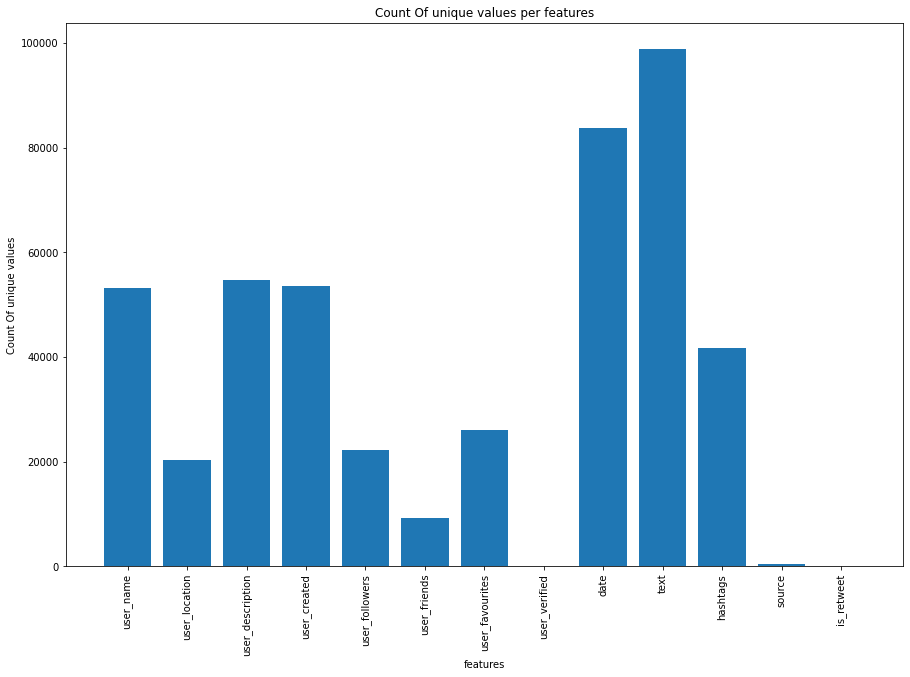

In [43]:
plt.figure(figsize=(15,10))
plt.bar(df_unique.column,df_unique.unique_values)
plt.title("Count Of unique values per features")
plt.xlabel("features")
plt.ylabel("Count Of unique values")
plt.xticks(rotation = 90)
plt.show()


### EDA on Tweet count with Source

In [44]:
Source_df = covid_data.source.value_counts().reset_index()
Source_df.sort_values(by='source',ascending=False,inplace=True)
Source_df.rename(columns = {'index':'Source', 'Source':'Count'}, inplace = True)

In [45]:
Source_df

,Source,source
0,Twitter Web App,32288
1,Twitter for Android,21461
2,Twitter for iPhone,18572
3,TweetDeck,5392
4,Hootsuite Inc.,4268
...,...,...
348,InfoBlaze India,1
347,Bot Libre!,1
346,Promo.com,1
345,BT Production Site,1


In [46]:
covid_data["source"].value_counts().reset_index()["index"].astype("str")

0               Twitter Web App
1           Twitter for Android
2            Twitter for iPhone
3                     TweetDeck
4                Hootsuite Inc.
                 ...           
427    Janetter Pro for Android
428     TD Wealth Social Centre
429               SpaceRefTweet
430                    Planable
431                  GroupTweet
Name: index, Length: 432, dtype: object

In [47]:
covid_unique_source_count = covid_data["source"].value_counts().reset_index()["index"].astype("str")
for i in covid_unique_source_count:
    if type(i) != str:
        print(i)
covid_unique_source_count

0               Twitter Web App
1           Twitter for Android
2            Twitter for iPhone
3                     TweetDeck
4                Hootsuite Inc.
                 ...           
427    Janetter Pro for Android
428     TD Wealth Social Centre
429               SpaceRefTweet
430                    Planable
431                  GroupTweet
Name: index, Length: 432, dtype: object

In [48]:
dict(covid_data["source"].value_counts())

{'Twitter Web App': 32288,
 'Twitter for Android': 21461,
 'Twitter for iPhone': 18572,
 'TweetDeck': 5392,
 'Hootsuite Inc.': 4268,
 'Twitter for iPad': 2425,
 'Buffer': 1693,
 'Instagram': 1212,
 'Sprout Social': 1152,
 'IFTTT': 792,
 'LinkedIn': 422,
 'WordPress.com': 416,
 'Twitter Media Studio': 416,
 'FS Poster': 403,
 'Sprinklr': 350,
 'GlobalPandemic.NET': 320,
 'HubSpot': 293,
 'Blood Donors India': 281,
 'Paper.li': 252,
 'Dynamic Signal': 221,
 'Twitter for Advertisers': 206,
 'dlvr.it': 204,
 'HN_Comments': 191,
 'Fabrik.fm': 174,
 'IAMBLOG2TWITTER': 129,
 'ContentStudio.io': 118,
 'rate_twitte': 116,
 'Tweetbot for iΟS': 116,
 'Twitter for Mac': 115,
 'Zoho Social': 113,
 'Hocalwire Social Share': 110,
 'Social Media Publisher App': 107,
 'SocialPilot.co': 103,
 'Khoros': 98,
 'Oktopost': 97,
 'Salesforce - Social Studio': 94,
 'China Xinhua News': 94,
 'TweetCaster for Android': 84,
 'Twitter Media Studio - LiveCut': 84,
 'SocialFlow': 79,
 'AgoraPulse Manager': 77,
 'Orl

Text(0, 0.5, 'Count Of tweets per Sources')

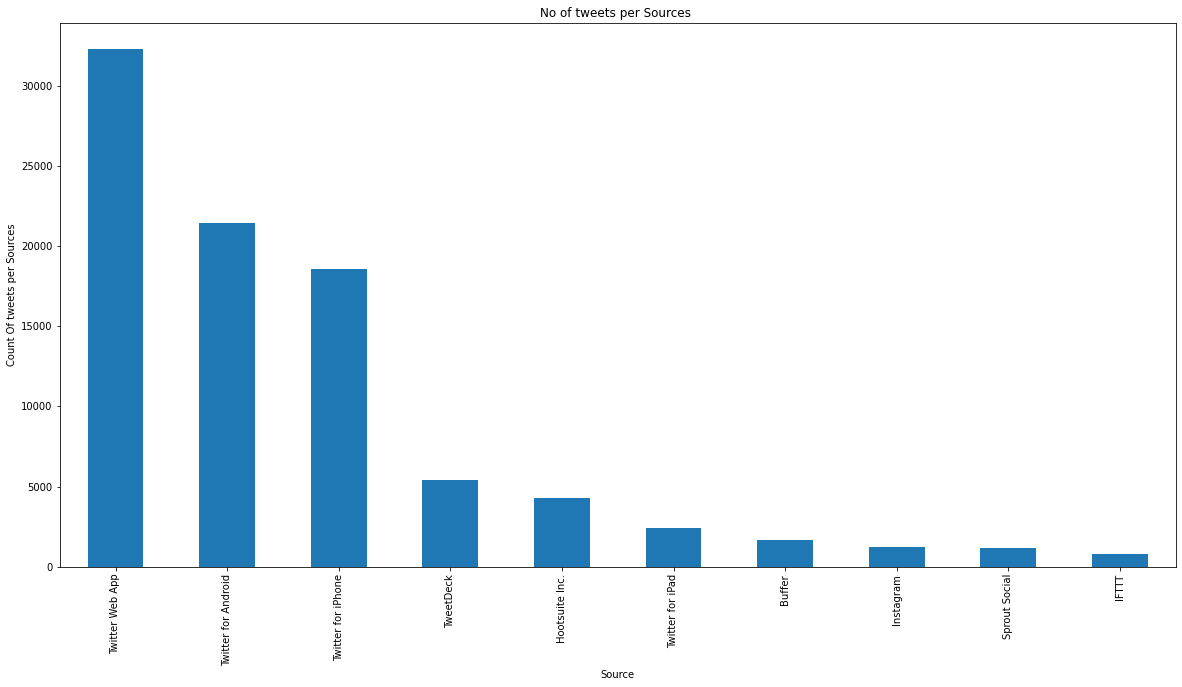

In [49]:
# 

plt.figure(figsize=(20,10))
user_source = covid_data.source.value_counts().head(10).plot.bar()
plt.title("No of tweets per Sources ")
plt.xlabel("Source")
plt.ylabel("Count Of tweets per Sources")


In [50]:
unique_user_loc_dict = dict(covid_data["user_location"].value_counts())
unique_user_loc_list =list(unique_user_loc_dict.keys())

In [51]:
unique_user_loc_dict
len(unique_user_loc_dict)

20371

In [52]:
user_loc_india=get_close_matches('India',list(unique_user_loc_list),cutoff=0.2)
print(user_loc_india)

TypeError: object of type 'int' has no len()

In [ ]:
unique_user_loc_list

In [ ]:
covid_data["user_location"].unique()

In [ ]:
if type('Joban')  == str:
    print("Joban")

In [ ]:
type("Joban")

In [ ]:
user_loc_not_str = {i for i in covid_data["user_location"] if type(i) != str}    

In [ ]:
#{unique_user_loc_dict.get(i):i for i in unique_user_loc_dict if type(i) != str}    

In [ ]:
user_loc_not_str

In [ ]:
len(user_loc_not_str)

In [ ]:
unique_user_loc_dict[10101]

In [ ]:
import datetime
unique_user_loc_dict[datetime.time(21, 21)]

In [ ]:
str(datetime.time(21, 21))

In [ ]:
#pass it as argument unique_user_loc_dict
def user_loc_match(match):
    for i in range(len(match)):
        if type(match[i]) != str:
            #print(match[i])
            #print(str(match[i]))
            match[i] = str(match[i])
        else :
            pass
        
    

In [ ]:
unique_user_loc_list

In [ ]:
l2 = [1.0]
user_loc_match(l2)
type(l2[0])

In [ ]:
user_loc_match(unique_user_loc_list)

In [ ]:
for i in unique_user_loc_list:
    if type(i) != str:
        print(i)

In [ ]:
"10101" in unique_user_loc_list

In [ ]:
"datetime.time(21, 21)" in unique_user_loc_list

In [ ]:
unique_user_loc_list.index('10101')

In [ ]:
covid_data.loc[17610]

In [ ]:
str(unique_user_loc_list[17610]).replace(unique_user_loc_list[17610],str(unique_user_loc_list[17610]))

In [ ]:
#unique_user_loc_dict["GroupTweet"]

In [ ]:
covid_data.hashtags[2].dtypes

In [ ]:
covid_data.hashtags[4].dtypes

In [ ]:
covid_data.hashtags

In [ ]:
print(type(covid_data.hashtags[2]))
print(covid_data.hashtags[2])

In [ ]:
print(type(covid_data.hashtags[4]))
print(covid_data.hashtags[4])

In [ ]:
covid_hashtags =covid_data.hashtags
for i in covid_hashtags[:50]:
    print(type(i))

In [ ]:
for i in covid_data.hashtags:
    if type(i) != list:
        print(i.strip(']['))#.split(', '))
        

In [ ]:
hashtag_list = [i.strip('][') for i in covid_data.hashtags if type(i) != list]

In [ ]:
hashtag_list

### Convert a string representation of list into list in Python

In [ ]:
stringA = "[Mon, 2, Tue, 5,]"
# Given string
print("Given string", stringA)
print(type(stringA))
# String to list
res = stringA.strip('][').split(', ')
# Result and its type
print("final list", res)
print(type(res))

In [ ]:
covid_data.head()

In [ ]:
covid_data['hashtags'] = covid_data['hashtags'].apply(lambda cell:''.join(c for c in cell if c not in "'[]").split(', '))

In [ ]:
type(covid_data.hashtags[2])

In [ ]:
new_df = covid_data.explode("hashtags",ignore_index=True)

In [ ]:
new_df.head()

In [ ]:
l3 = []
for c in "['Joban']":
    if c not in "'[]":
        l3.append(c)

In [ ]:
l3

In [ ]:
"".join(l3).split(', ')

In [ ]:
"".join(l3)#.split(',')

In [ ]:
hashtags_df = new_df.hashtags.value_counts().reset_index()
hashtags_df.sort_values(by='hashtags',ascending=False,inplace=True)
hashtags_df.rename(columns = {'index':'hashtags', 'hashtags':'Count'}, inplace = True)

In [ ]:
hashtags_df

In [ ]:
plt.figure(figsize=(20,10))
hashtag = new_df.hashtags.value_counts().head(50).plot.bar()
plt.title("No of tweets on hashtags v/s hashtags")
plt.xlabel("Hashtags")
plt.ylabel("No of tweets on hashtags")
